# Back Propagation from Scratch

En esta sección se trabajará con los algoritmos que resuelven las redes neuronales *Feed Forward*, es decir, los algoritmos que encuentran valores óptimos para sus pesos. Para esto se implementará estos algoritmos desde 0 (*from scratch*) teniendo unicamente el apoyo de librerías para operaciones básicas como lo entrega **numpy**.

### a) Entrenar una red **FF**

In [22]:
import numpy as np

epsilon =  1e-15
#----funcion de activacion y gradiente
def sigmoid(x):
    if x > 0:
        x = np.maximum(epsilon, x) #si x es muy pequeño
    if x <0:
        x = np.maximum(-600,x)  #si x es muy negativo
    return 1 / (1 + np.exp(-x))
    
def gradient_sigmoid(x):
    return sigmoid(x)*(1-sigmoid(x))

#---funcion de perdida y gradiente
def loss_function(y,ypred):
    #binary
    ypred = np.maximum(epsilon, ypred)
    return -1.0*( y*np.log(ypred) + np.subtract(1,y)*np.log(np.subtract(1,ypred)) ) 

    #error cuadratico
    #return np.pow(y-ypred,2)/2
def gradient_loss_function(y,ypred):
    #binary
    ypred = np.maximum(epsilon, ypred)
    return -1.0* ( y-ypred)/(ypred*np.subtract(1,ypred))
    
    #error cuadratico
    #return y-ypred

#funcion que crea la arquitectura y crea las matrices 
#necesarias para almacenar informacion
def crear_arquitectura(input_dim,H,O,L):
    # numero de neuronas por capa
    S = range(L)
    S[0] = input_dim #input
    S[1] = H #oculta
    S[2] = O #salida
    
    #inicializan matrices de salidas de neuronas
    A = range(L)
    A_der = range(L) 
    for l in range(0,L):
        A[l] = np.zeros(S[l]) #salida de capa l
        A_der[l] = A[l].copy()       #salida derivada de capa l
        
    #inicializa matrices que guardan derividas
    Error_salida = range(L)
    Error_peso = range(L)
    for l in range(0,L):
        Error_salida[l] = np.zeros(S[l]) # error salida de capa l
    for l in range(0,L-1):
        Error_peso[l] = np.zeros((S[l],S[l+1]))    
        
    return S,A,A_der, Error_salida, Error_peso

#inicializa pesos
def init(L,S): 
    WM = range(L-1)
    for l in range(0,L-1):
        #WM[l] = np.zeros((S[l],S[l+1]))
        WM[l] = np.random.rand(S[l],S[l+1])
    return WM  

#realiza un forward pass de un par (xi,yi)
def forward_pass(xi,yi,L,WM, A,A_der,S):
    A[0] = xi.copy() #inicializa el input
    for l in range(0,L-1): #por cada transicion entre capas {0,L-2}        
        for s in range(0,S[l+1]): #por cada neurona de la capa siguiente
            aux = np.dot( WM[l][:,s], A[l])
            A[l+1][s] = sigmoid(aux).copy()
            A_der[l+1][s] = gradient_sigmoid(aux).copy()

def backward_pass(xi,yi,L,WM,A,A_der,S, Error_salida,Error_peso,lr):
    #calcula el error en la ultima capa
    for s in range(0,S[L-1]): 
        #arquitectura con multiples salidas (y es un vector)
        ypred = A[L-1].copy()
        Error_salida[L-1][s] = gradient_loss_function(yi[s], ypred[s])
        Error_peso[L-2][:,s] = np.dot(Error_salida[L-1][s], np.dot(A_der[L-1][s], A[L-2]) )
        
        #actualizar pesos en vector
        WM[L-2][:,s] = WM[L-2][:,s] - lr*Error_peso[L-2][:,s]
    #calcula el error recurisvamente
    for l in np.arange(L-2,0,-1): #desde la penultima capa hasta la segunda {L-2,1}
        for s in range(0,S[l]): #para cada neurona en la capa l
            Error_salida[l][s] = np.sum(Error_salida[l+1])
            Error_peso[l-1][:,s] =  np.dot( Error_salida[l][s], np.dot( A_der[l][s], A[l-1]) )
            
            #actualizar pesos en vector
            WM[l-1][:,s] = WM[l-1][:,s] - lr*Error_peso[l-1][:,s]
            
#estructura de red neuronal con sus atributos necesarios
class red_neuronal:
    def __init__(self,args):
        self.L = args[0]
        self.input_dim = args[1]
        self.H = args[2]
        self.O = args[3]
        self.S, self.A, self.A_der,self.E_salida,self.E_pesos = crear_arquitectura(
                                                                    self.input_dim,
                                                                    self.H,
                                                                    self.O,
                                                                    self.L
                                                                    )
        self.WM = init(self.L,self.S)          
        
    def entrenar(self,X,Y,lr,epochs):
        loss_por_epoch = []
        error_por_epoch = []
        for i in range(epochs): #criterio de parada
            loss = []
            error =[]
            
            #con sgd un ejemplo a la vez
            datos = zip(X,Y)
            np.random.shuffle(datos)
            for xi,yi in datos: 
                #actualizan las salidas
                forward_pass(xi,yi,self.L,self.WM, self.A,self.A_der,self.S)
                
                #medir el error y loss
                ypred = self.A[self.L-1].copy()
                loss.append(loss_function(yi,ypred))
                error.append( 1 - yi[np.argmax(ypred)] )
            
                #actualizan los pesos
                backward_pass(xi,yi,self.L,self.WM,self.A,self.A_der,self.S,self.E_salida,self.E_pesos,lr)
            loss_por_epoch.append( np.mean(loss) )
            error_por_epoch.append( np.mean(error) )
        return loss_por_epoch,error_por_epoch
                  
print "hola mundo"

hola mundo


En la celda anterior se implementan las 4 funciones solicitadas las cuales inicializan los pesos en la primera iteración para la red neuronal, implementar el *forward pass* el cual entrega un input a la red pasando a través de todas las capas, generando el output correspondiente, el *backward pass* el cual calcula la pérdida (*loss*) en la última capa y esta es traspasada hacia atrás actualizando los pesos a cada capa. Finalmente se implementa la rutina que entrena a la red ejemplo por ejemplo una cantidad de *epochs* fijos.  
Detalles de la implementación anterior es que se cambiaron los indices asociados a la notación vista en clases, ya que para python los indices inician en 0 en vez de 1, por lo que se implementó de esa forma, donde la capa y pesos iniciales parten desde el indice 0.  
La actualización de los pesos es vectorial, es decir, se actualizan los pesos de todas las neuronas que llegan a la neurona *s* de alguna capa en particular. 
Más detalles de la implementación son los siguientes:  
* S es una lista 
    * $S[l]$ es la cantidad de neuronas de la capa *l*
* A y A_der es lista de arrays numpy
    * $A[l][s]$ es la salida de la neurona *s* en la capa *l*
* WM es una lista de matrices numpy
    * $WM[l][s,:]$ pesos de los valores que salen de la neurona *s* de la capa *l*
    * $WM[l][:,s]$ pesos de los valores que entran a la *s* en la capa *l+1* 
* Error son listas de matrices numpy
    * $Error[l][s]$ es la derivada del error sobre la salida o pesos de la neurona *s* en la capa *l*

Las distintas funciones implementadas reciben los argumentos necesarios para ejecutarse, siendo algunos de los descritos anteriormente. La función de activación implementada es la sigmoidal y la función de pérdida es la *binary cross entropy*.

### b) Predicciones con la red

In [272]:
#FF  = red ya entrenada
def predecir(X_test,y_test,FF):
    n_test = len(y_test)
    print "numero de ejemplos: ",n_test
    
    predicciones = []
    for xi,yi in zip(X_test,y_test): #para n_test ejemplos
        y_hat = forward_pass(xi,yi,FF.L,FF.WM, FF.A,FF.A_der,FF.S)
        predicciones.append(y_hat)
    return predicciones

La función anterior predice la salida de la red neuronal para un conjunto de entradas, realizando un *forward pass* para cada dato de entrada y prediciendo su salida.

### c) Probar programa creado

In [23]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt'
df = pd.read_csv(url, sep=r'\s+',header=None)
X_train = df.ix[:,0:6]
y_train = df.ix[:,7]
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

print X_train.shape
print y_train.shape

(210, 7)
(210,)


El dataset sobre el cual se probará el programa de una red neuronal *Feed Forward* es el de **seeds**, con 210 filas representando los distintos ejemplos y con 7 atributos para lograr realizar la tarea adecuadamente. La tarea consta en clasificar un ejemplo como un tipo de semilla en específico (3 clases), por lo que es una tarea de clasificación de multiclases.

In [24]:
def softmax(x):
    retorno = np.zeros(len(x))
    suma =0.0
    for i in x:
        valor = np.maximum(epsilon,i)
        suma+=np.exp(valor)
    for i in range(len(x)):
        valor = np.maximum(epsilon,x[i])
        retorno[i] = np.exp(valor)/suma #salida normalizada
    return retorno
def gradient_softmax(x):
    return softmax(x)*(1-softmax(x))

def forward_pass(xi,yi,L,WM, A,A_der,S):
    A[0] = xi.copy() #inicializa el input
    for l in range(0,L-1): #por cada capa        
        for s in range(0,S[l+1]): #por cada neurona de la capa siguiente
            aux = np.dot( WM[l][:,s], A[l])
            A[l+1][s] = sigmoid(aux)
            A_der[l+1][s] = gradient_sigmoid(aux)
    #ultima capa softmax
    A[L-1] = softmax(A[L-1]) 
    A_der[L-1] = gradient_softmax(A[L-1])
    return A[L-1].copy()

Se añade la función de activación softmax a la última capa debido a que el problema de multiclases lo amerita y así tener la capa de salida normalizada, ya que la clasificación es mutuamente excluyente por lo que un ejemplo solo pertenece a una clase.

In [45]:
#y en un hot vector
nuevo_df = pd.get_dummies(df,columns =[7])
casi_y = nuevo_df.ix[:,7:10]
y_hotvector = np.asarray(casi_y)
print y_train[0]
print y_hotvector[0]
print y_hotvector.shape

#Creacion de la red FF
L = 3
input_dim = X_train.shape[1]
H = 32 #hidden
O = 3 #outpit
FF = red_neuronal([L,input_dim,H,O])
loss,error = FF.entrenar(X_train,y_hotvector,lr = 0.5 ,epochs = 100)

1
[1 0 0]
(210, 3)


En primer lugar se transforma el *target* en un vector de 3 dimensiones representando cada clase donde tiene un 1 en la clase que corresponde al ejemplo, es decir, un **hot vector**.  
En la celda anterior se entrena la red creada con 3 capas, 32 neuronas en la capa escondida y 3 neuronas en la capa de salida debido a que el problema es un problema de clasificación de 3 clases. La función de activación seleccionada anteriormente es la sigmoidal, esencial para problemas de clasificación. La función de pérdida es la *binary cross entropy*.  
Se entrena la red con *learning rate* de 0.5 y número de epochs igual a 100.

In [282]:
print predecir(X_train,y_hotvector ,FF)[:5]

numero de ejemplos:  210
[array([ 0.42230625,  0.15538749,  0.42230625]), array([ 0.42230678,  0.15538643,  0.42230678]), array([ 0.32901517,  0.32179987,  0.34918496]), array([ 0.36236482,  0.23696194,  0.40067324]), array([ 0.40862035,  0.18275931,  0.40862035])]


En la celda anterior se verifica que funciona el programa creado anteriormente para hacer prediciones con la red neuronal creada, entregando una predicción para cada valor del conjunto requerido.

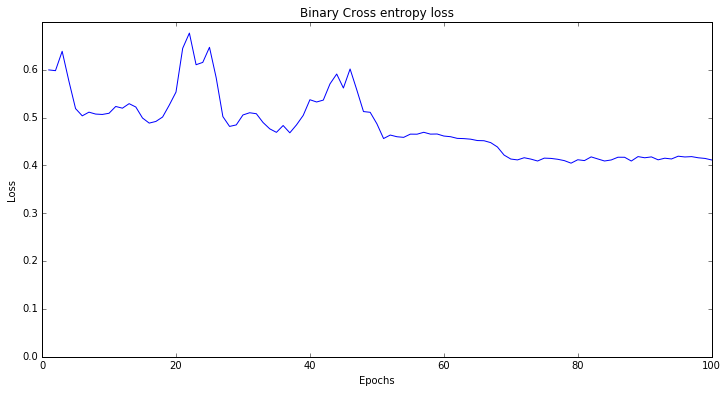

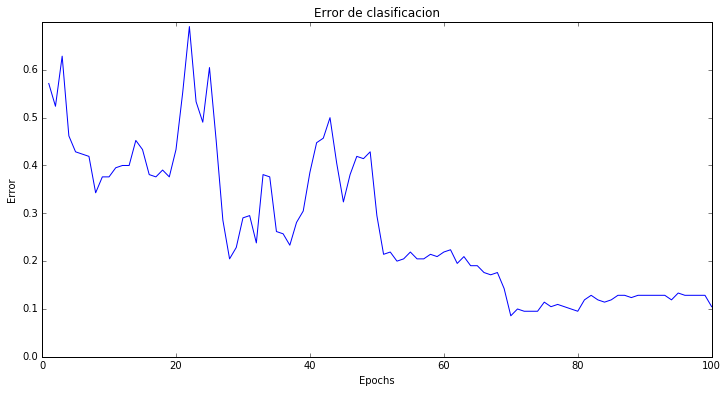

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.title("Binary Cross entropy loss")
plt.plot(np.arange(1,101),loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0,0.7)
plt.show()
plt.clf()

plt.figure(figsize=(12,6))
plt.title("Error de clasificacion")
plt.plot(np.arange(1,101),error)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.ylim(0,0.7)
plt.show()

En la celda anterior se presentan dos gráficos. En el primero se aprecia la función objetivo, que en este caso es el **binary cross entropy** dado que no existe regularizador. En este gráfico hay varios montes/cimas, esto significa que el algoritmo va explorando distintas regiones del espacio de búsqueda de una manera aleatoria debido a su variación, pero a medida que avanzan los epochs se mantiene una tendencia constante a descender el error. 

En el segundo gráfico, se ve el error de clasificación de la red neuronal implementada a medida que se realizan epochs, este error es máximo (100%) cuando la predicción es incorrrecta y es mínimo (0%) cuando la predicción es correcta. Se puede visualizar que hay grandes cambios en el valor del error, esto se debe a la estricta evaluación. Esto es, las cimas del error implican que para esos epochs, el modelo clasificó a la mayoría de los datos de forma errónea, o sea, le otorgó una mayor probabilidad de clasificación a la etiqueta incorrecta. A medida que van aumentando los epochs, el modelo logra aprender y ajustarse de buena manera para mantener un error bajo, aproximadamente del 10%.  
Se puede ver la forma mas *suave* de la función de pérdida **binary cross entroy**, esto es para explorar de una mejor manera el espacio de búsqueda que una función tan *tosca* como el error de clasificación.

### d) weight decay

In [1]:
def backward_pass(xi,yi,L,WM,A,A_der,S, Error_salida,Error_peso,lr,weight_decay):
    #...
    WM[l-1][:,s] = (1- weight_decay) * WM[l-1][:,s] - lr*Error_peso[l-1][:,s]
    #...
    

def entrenar(self,X,Y,lr,epochs,weight_decay):
    #...
    backward_pass(xi,yi,self.L,self.WM,self.A,self.A_der,self.S,self.E_salida,self.E_pesos,lr,weight_decay)
    #...

#actualizar weight decay

Esto muestra cómo se debería añadir la variación al algoritmo, *weight decay*, para que se reste y decaiga los pesos en cada *epoch*, actuando como regularización.